Ayse Bilgin - 2019203159, Damla Kayikci - 2020400228, Kerem Yavuz - 2020300303

# Setup

In [59]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df1 = pd.read_csv("gdp_data.csv", sep=";")
df1.rename(columns={"income":"gdp", "capital":"K", "labor":"L"}, inplace=True)
df1['logL'] = np.log(df1['L'])
df1['logK'] = np.log(df1['K'])



# Q1

## a.

In [60]:
# reg
model = smf.ols(formula='gdp ~ logK + logL', data=df1).fit()

## b.

       gdp     fitted_gdp     residuals
0   114043   96558.726865  17484.273135
1   120410  110172.106088  10237.893912
2   129187  122783.318055   6403.681945
3   134705  133126.590949   1578.409051
4   139960  142942.828737  -2982.828737
5   150511  154117.521516  -3606.521516
6   157897  165159.945505  -7262.945505
7   165286  175374.844531 -10088.844531
8   178491  186985.202856  -8494.202856
9   199457  201945.689500  -2488.689500
10  212323  216104.901129  -3781.901129
11  226977  231437.790602  -4460.790602
12  241194  248073.041859  -6879.041859
13  260881  264359.376345  -3478.376345
14  277498  281004.285489  -3506.285489
15  296530  297126.309289   -596.309289
16  306712  310958.642132  -4246.642132
17  329030  326650.838276   2379.161724
18  354057  343352.323383  10704.676617
19  374977  361891.716895  13085.283105

Estimated Parameters:
Intercept   -2.518132e+06
logK        -1.208071e+04
logL         2.248708e+05
dtype: float64

Model Summary:
                            

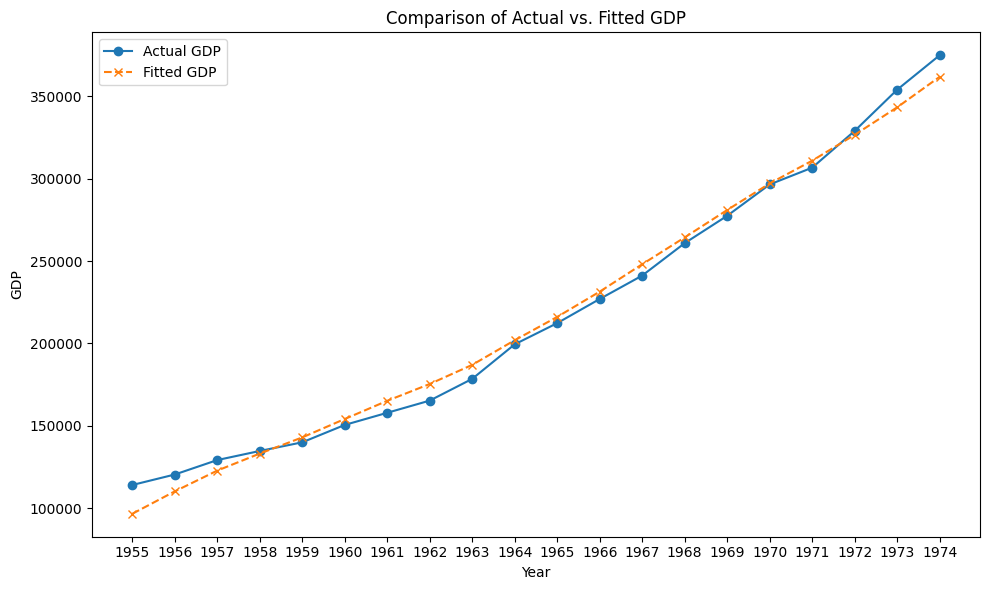

In [80]:
df1['fitted_gdp'] = model.fittedvalues
df1['residuals'] = model.resid
print(df1[['gdp', 'fitted_gdp', 'residuals']])
#plotting
print("\nEstimated Parameters:")
print(model.params)
print("\nModel Summary:")
print(model.summary())

plt.figure(figsize=(10, 6))
plt.plot(df1['date'], df1['gdp'], label='Actual GDP', marker='o', linestyle='-')
plt.plot(df1['date'], df1['fitted_gdp'], label='Fitted GDP', linestyle='--', marker='x')
plt.xticks(ticks=range(int(df1['date'].min()), int(df1['date'].max()) + 1, 1))
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Comparison of Actual vs. Fitted GDP')
plt.tight_layout()
plt.show()

## YORUMLANACAK

## c. - d.

In [91]:
# c and d
np.random.seed(300)
n = len(df1)
sigma = model.resid.std()

# Define error distributions
error_distributions = ['Normal','t(5)','t(10)','t(20)','t(25)','t(100)']

# Monte Carlo Simulation settings
simulations = 1000  # Number of Monte Carlo simulations
mc_results = {}
for dist_name in error_distributions:
    b0 = np.full(simulations, np.nan)  # Intercept estimates
    b1 = np.full(simulations, np.nan)  # logK coefficient estimates
    b2 = np.full(simulations, np.nan)  # logL coefficient estimates

    for sim in range(simulations):
        if dist_name == 'Normal':
            errors = np.random.normal(0, sigma, n)
        else:
            df = int(dist_name.split('(')[1].strip(')'))
            errors = np.random.standard_t(df, size=n) * sigma

        simulated_gdp = model.predict() + errors
        simulated_df = df1.copy()
        simulated_df['simulated_gdp'] = simulated_gdp
        sim_model = smf.ols(formula='simulated_gdp ~ logK + logL', data=simulated_df).fit()

        b0[sim] = sim_model.params['Intercept']
        b1[sim] = sim_model.params['logK']
        b2[sim] = sim_model.params['logL']

    # Store results for this error distribution
    mc_results[dist_name] = {
        'Intercept': b0,
        'logK': b1,
        'logL': b2,
    }

true_params = model.params

# MC means and SEs
mc_summary = pd.DataFrame(index=['Intercept', 'logK', 'logL'])

for dist_name, params in mc_results.items():
    mc_summary[f'{dist_name} Mean'] = [np.mean(params['Intercept']), np.mean(params['logK']), np.mean(params['logL'])]
    mc_summary[f'{dist_name} SE'] = [np.std(params['Intercept']), np.std(params['logK']), np.std(params['logL'])]

# plotting
print("\nTrue Results:")
print(model.params)
print("\nMonte Carlo Simulation Results:")
print(mc_summary)


True Results:
Intercept   -2.518132e+06
logK        -1.208071e+04
logL         2.248708e+05
dtype: float64

Monte Carlo Simulation Results:
            Normal Mean      Normal SE     t(5) Mean        t(5) SE  \
Intercept -2.514157e+06  160805.556704 -2.523899e+06  215684.165188   
logK      -1.294121e+04   49024.677326 -1.026557e+04   65735.776179   
logL       2.251837e+05   24685.181146  2.239969e+05   32834.964722   

             t(10) Mean       t(10) SE    t(20) Mean       t(20) SE  \
Intercept -2.523185e+06  190931.194604 -2.518949e+06  171717.563296   
logK      -1.089616e+04   58777.305044 -1.269559e+04   52000.182648   
logL       2.243960e+05   29508.196166  2.253813e+05   25999.867051   

             t(25) Mean       t(25) SE   t(100) Mean      t(100) SE  
Intercept -2.507873e+06  174753.290961 -2.524990e+06  169343.992982  
logK      -1.465968e+04   53415.831465 -1.024545e+04   51721.388066  
logL       2.259576e+05   26692.043558  2.240638e+05   25880.853855  


## e.

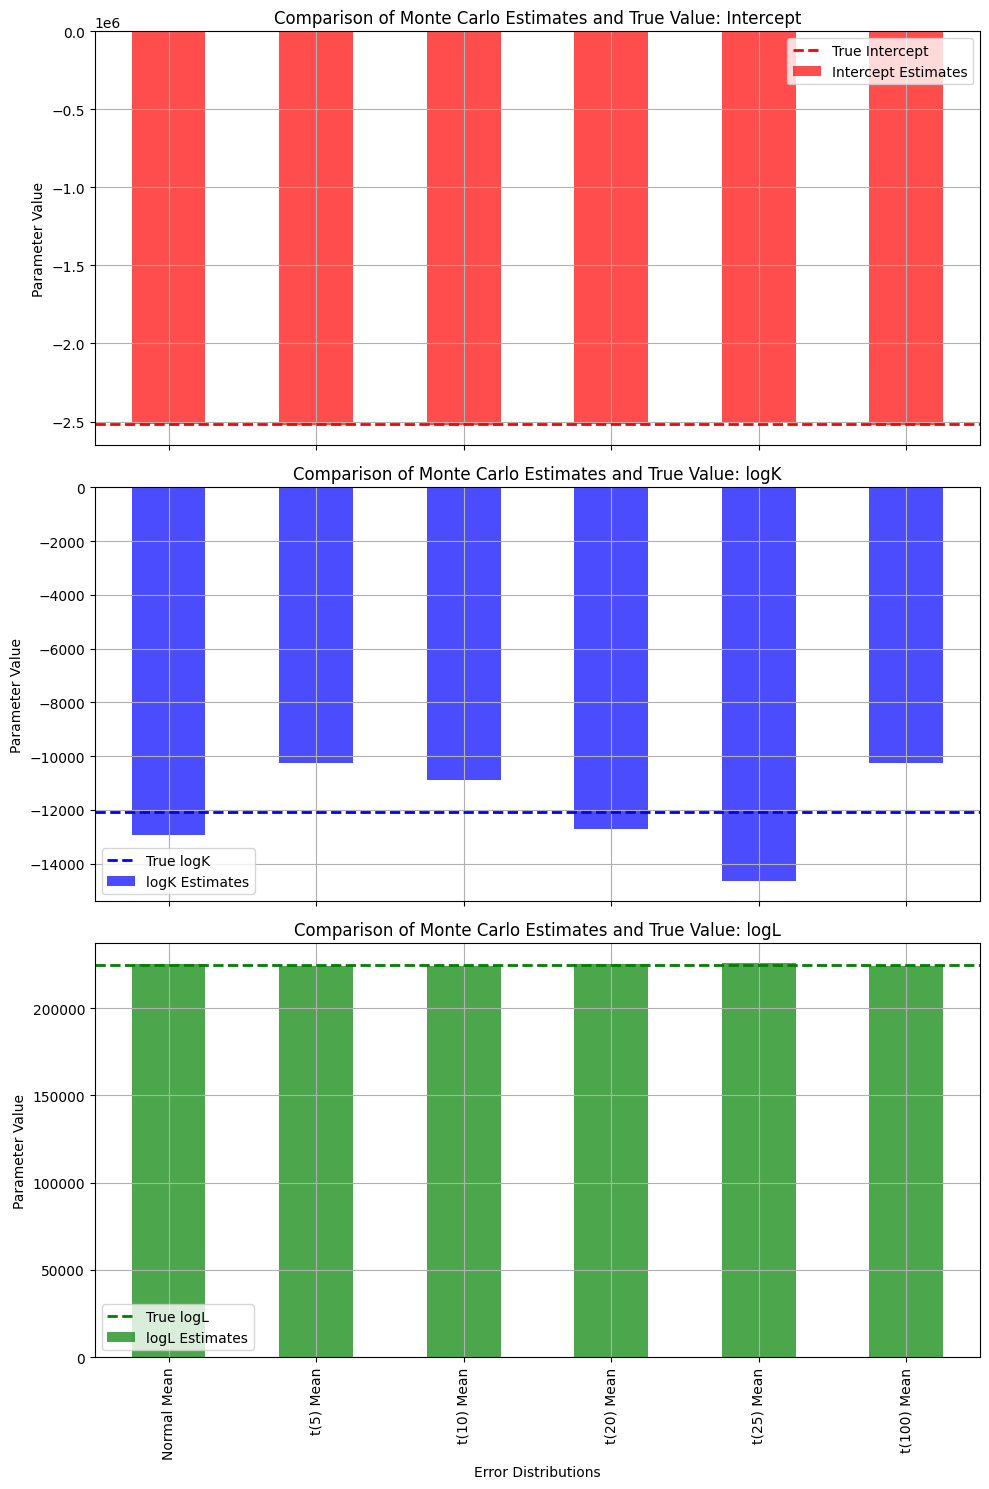

In [92]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
parameters = ['Intercept', 'logK', 'logL']
colors = ['red', 'blue', 'green']
for i, param in enumerate(parameters):
    mc_summary.filter(like='Mean').T[param].plot(kind='bar', ax=axes[i], color=colors[i], alpha=0.7, label=f'{param} Estimates')
    axes[i].axhline(true_params[param], color=colors[i], linestyle='--', linewidth=2, label=f'True {param}')
    axes[i].set_title(f'Comparison of Monte Carlo Estimates and True Value: {param}')
    axes[i].set_ylabel('Parameter Value')
    axes[i].legend()
    axes[i].grid(True)
axes[-1].set_xlabel('Error Distributions')
plt.tight_layout()
plt.show()

# f

## f.

In [106]:
ols_variance = model.cov_params()
ols_se = model.bse

print("\nInitial OLS Regression (Part A):")
print("Variance:")
print(ols_variance)
print("\nSE:")
print(ols_se)

# Initialize an empty list to collect rows
results = []

# Compute variance and SE for each parameter and error distribution
for dist_name in error_distributions:
    for param in ['Intercept', 'logK', 'logL']:
        # Variance for this parameter across simulations
        avg_variance = np.var(mc_results[dist_name][param])
        # SE for this parameter from the summary
        avg_se = mc_summary.loc[param, f'{dist_name} SE']

        # Collect the results as a dictionary
        results.append({
            'Error Distribution': dist_name,
            'Parameter': param,
            'Avg Variance': avg_variance,
            'Avg SE': avg_se
        })

# Convert the list of dictionaries into a DataFrame
mc_avg_var_se = pd.DataFrame(results)

# Display the results
print("\nAverage Variance and SE for Each Error Distribution:")
print(mc_avg_var_se)



Initial OLS Regression (Part A):
Variance:
              Intercept          logK          logL
Intercept  3.113404e+10 -8.911081e+09  4.085652e+09
logK      -8.911081e+09  2.922484e+09 -1.442429e+09
logL       4.085652e+09 -1.442429e+09  7.365961e+08

SE:
Intercept    176448.402971
logK          54060.007454
logL          27140.304052
dtype: float64

Average Variance and SE for Each Error Distribution:
   Error Distribution  Parameter  Avg Variance         Avg SE
0              Normal  Intercept  2.585843e+10  160805.556704
1              Normal       logK  2.403419e+09   49024.677326
2              Normal       logL  6.093582e+08   24685.181146
3                t(5)  Intercept  4.651966e+10  215684.165188
4                t(5)       logK  4.321192e+09   65735.776179
5                t(5)       logL  1.078135e+09   32834.964722
6               t(10)  Intercept  3.645472e+10  190931.194604
7               t(10)       logK  3.454772e+09   58777.305044
8               t(10)       logL  8

## f. - g.

## h.

## i.

## j.

# Q2

# Q3

# Q4

# Q5

# Q6

# Q7